In [136]:
'''
采用从uci网站下载的car_evaluation数据集
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
sample_excel=pd.read_excel('AirQualityUCI.xlsx', header=0, index_col=0)
sample=sample_excel.values
data=sample[:,1:sample.shape[1]-1]
target=sample[:,sample.shape[1]-1:sample.shape[1]]
train_data, test_data, train_target, test_target=train_test_split(data, target, test_size=0.3, random_state=7) #分割数据集，20%的数据作为测试集


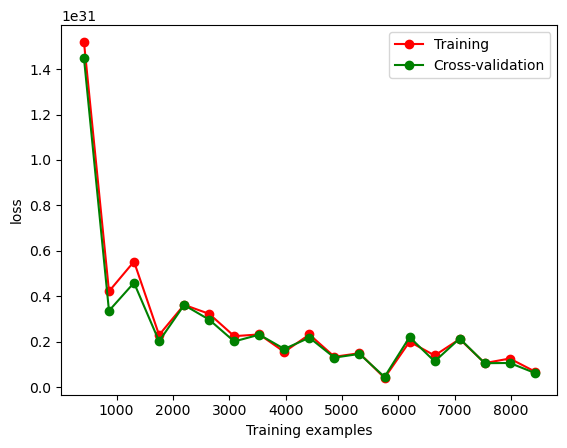

In [137]:
'''
选用线性回归,比较GD、SGD、小批量SGD算法的性能
'''
gd=SGDRegressor()
gd_r=gd.partial_fit(train_data, train_target.ravel())
#print(gd.score(train_data, train_target), gd.score(test_data, test_target))
# neg_mean_squared_error代表求均值平方差
train_sizes, gd_train_loss, gd_test_loss, gd_fit_time,_ = learning_curve(
    gd_r, data, target.ravel(), cv=10, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.05, 1.0, 19), return_times=True)

gd_fit_time_mean=np.mean(gd_fit_time, axis=1)
# loss值为负数，需要取反
gd_train_loss_mean = -np.mean(gd_train_loss, axis=1)
gd_test_loss_mean = -np.mean(gd_test_loss, axis=1)

# 设置样式与label
plt.plot(train_sizes, gd_train_loss_mean, 'o-', color="r",
         label="Training")
plt.plot(train_sizes, gd_test_loss_mean, 'o-', color="g",
        label="Cross-validation")

plt.xlabel("Training examples")
plt.ylabel("loss")
# 显示图例
plt.legend(loc="best")
plt.show()


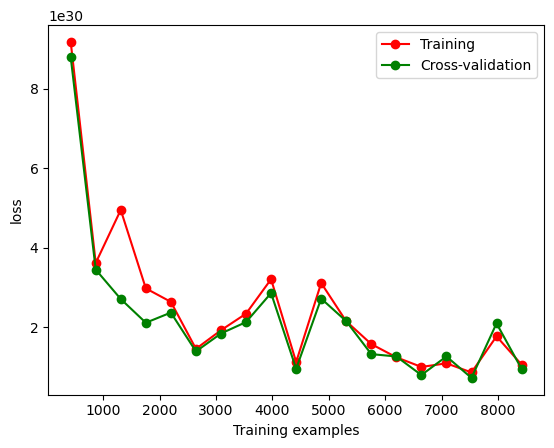

In [138]:
sgd=SGDRegressor()
#sgd.fit(train_data, train_target.ravel())
#print(sgd.score(train_data, train_target), sgd.score(test_data, test_target))
train_sizes, sgd_train_loss, sgd_test_loss, sgd_fit_time,_ = learning_curve(
    sgd, data, target.ravel(), cv=10, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.05, 1.0, 19), return_times=True)

sgd_fit_time_mean=np.mean(sgd_fit_time, axis=1)
# loss值为负数，需要取反
sgd_train_loss_mean = -np.mean(sgd_train_loss, axis=1)
sgd_test_loss_mean = -np.mean(sgd_test_loss, axis=1)

# 设置样式与label
plt.figure()
plt.plot(train_sizes, sgd_train_loss_mean, 'o-', color="r", label="Training")
plt.plot(train_sizes, sgd_test_loss_mean, 'o-', color="g", label="Cross-validation")

plt.xlabel("Training examples")
plt.ylabel("loss")
# 显示图例
plt.legend(loc="best")
plt.show()

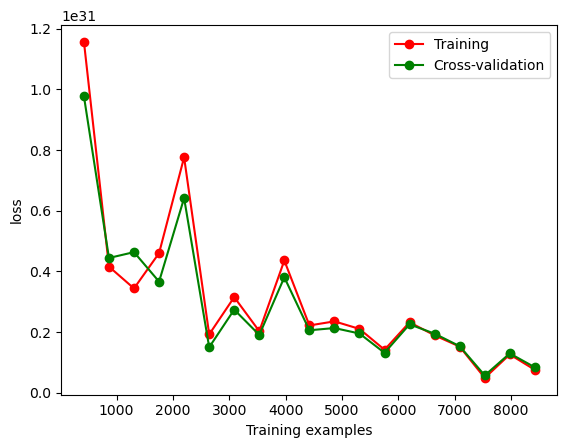

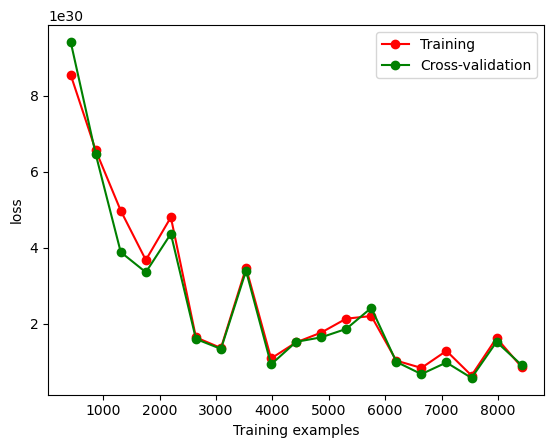

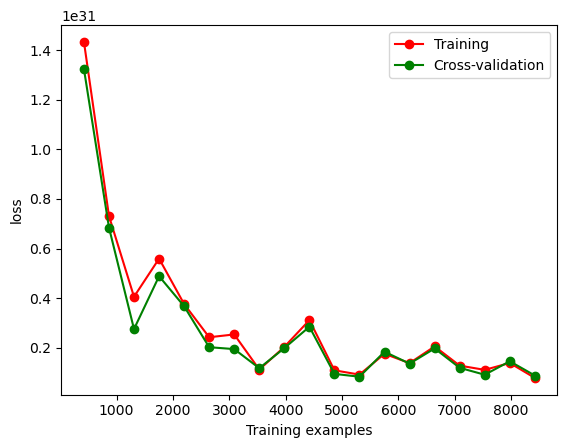

In [139]:
mb_sgd_fit_time_mean=[]
msgd_train_loss=[]
mini_batch_sgd=SGDRegressor()
for i in range(100, 1000, 300):
  train_data_batch=np.array_split(train_data, i)
  train_target_batch=np.array_split(train_target, i)
  for j in range(len(train_data_batch)):
    mini_batch_sgd.partial_fit(train_data_batch[j], train_target_batch[j].ravel())
  train_sizes, mb_sgd_train_loss, mb_sgd_test_loss, mb_sgd_fit_time,_ = learning_curve(
      mini_batch_sgd, data, target.ravel(), cv=10, scoring='neg_mean_squared_error',
      train_sizes=np.linspace(0.05, 1.0, 19), return_times=True)

  mb_sgd_fit_time_mean.append(np.mean(mb_sgd_fit_time, axis=1))
    # loss值为负数，需要取反
  mb_sgd_train_loss_mean = -np.mean(mb_sgd_train_loss, axis=1)
  mb_sgd_test_loss_mean = -np.mean(mb_sgd_test_loss, axis=1)
  msgd_train_loss.append(mb_sgd_train_loss_mean)
    # 设置样式与label
  plt.figure()
  plt.plot(train_sizes, mb_sgd_train_loss_mean, 'o-', color="r", label="Training")
  plt.plot(train_sizes, mb_sgd_test_loss_mean, 'o-', color="g", label="Cross-validation")
  plt.xlabel("Training examples")
  plt.ylabel("loss")
    # 显示图例
  plt.legend(loc="best")
  plt.show()

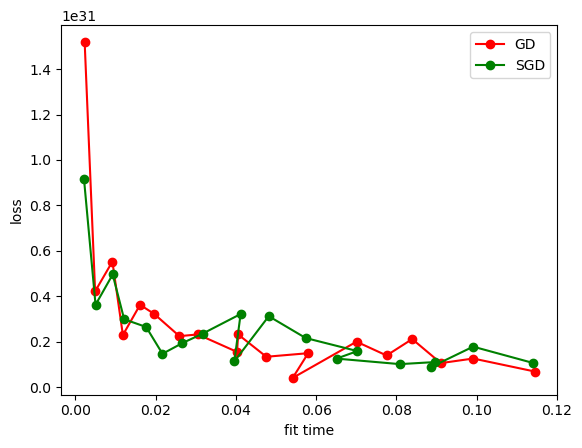

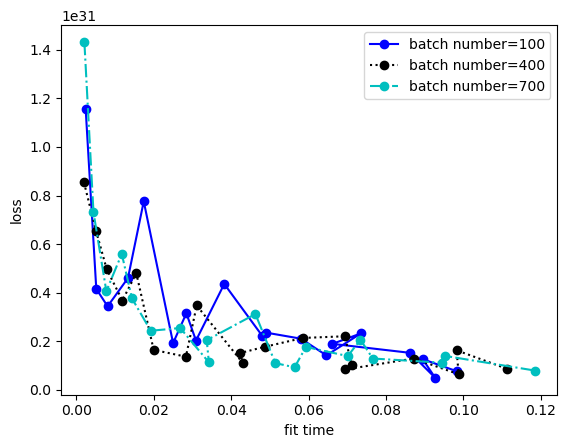

In [141]:
plt.figure()
plt.plot(gd_fit_time_mean, gd_train_loss_mean, 'o-', color="r", label="GD")
plt.plot(sgd_fit_time_mean, sgd_train_loss_mean, 'o-', color="g", label="SGD")

plt.xlabel("fit time")
plt.ylabel("loss")
# 显示图例
plt.legend(loc="best")
plt.show()

plt.figure()
plt.plot(mb_sgd_fit_time_mean[0], msgd_train_loss[0], 'o-', color="b", label="batch number=100")
plt.plot(mb_sgd_fit_time_mean[1], msgd_train_loss[1], 'o:', color="k", label="batch number=400")
plt.plot(mb_sgd_fit_time_mean[2], msgd_train_loss[2], 'o-.', color="c", label="batch number=700")
plt.xlabel("fit time")
plt.ylabel("loss")
# 显示图例
plt.legend(loc="best")
plt.show()